In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Stable_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/20DLnzLessData/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [7]:
config = get_config()
true_files, local_files, bws = get_drift_files(config=config, root_dir=root_dir)
len(local_files)

20

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_38884/377538874.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_38884/377538874.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


15.228943618987998 0.0073079 inf


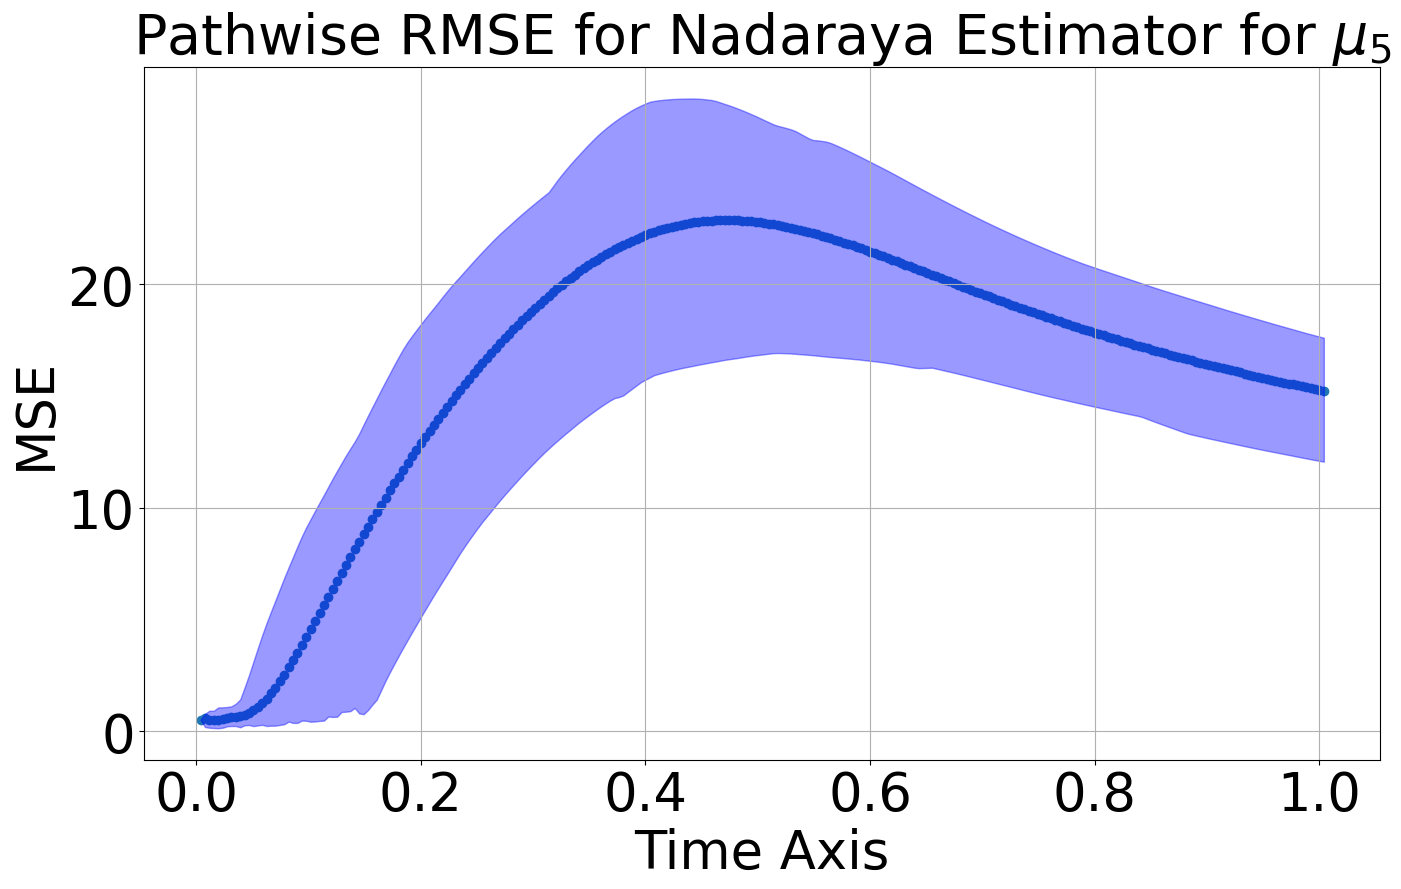

Final time cumulative MSE local-time error 15.228943618987998 with IQR ((12.066398241875968, 17.616213519216608))at bw 0.0073079 for 0.75FConst

14.742484611258313 0.009649 15.228943618987998


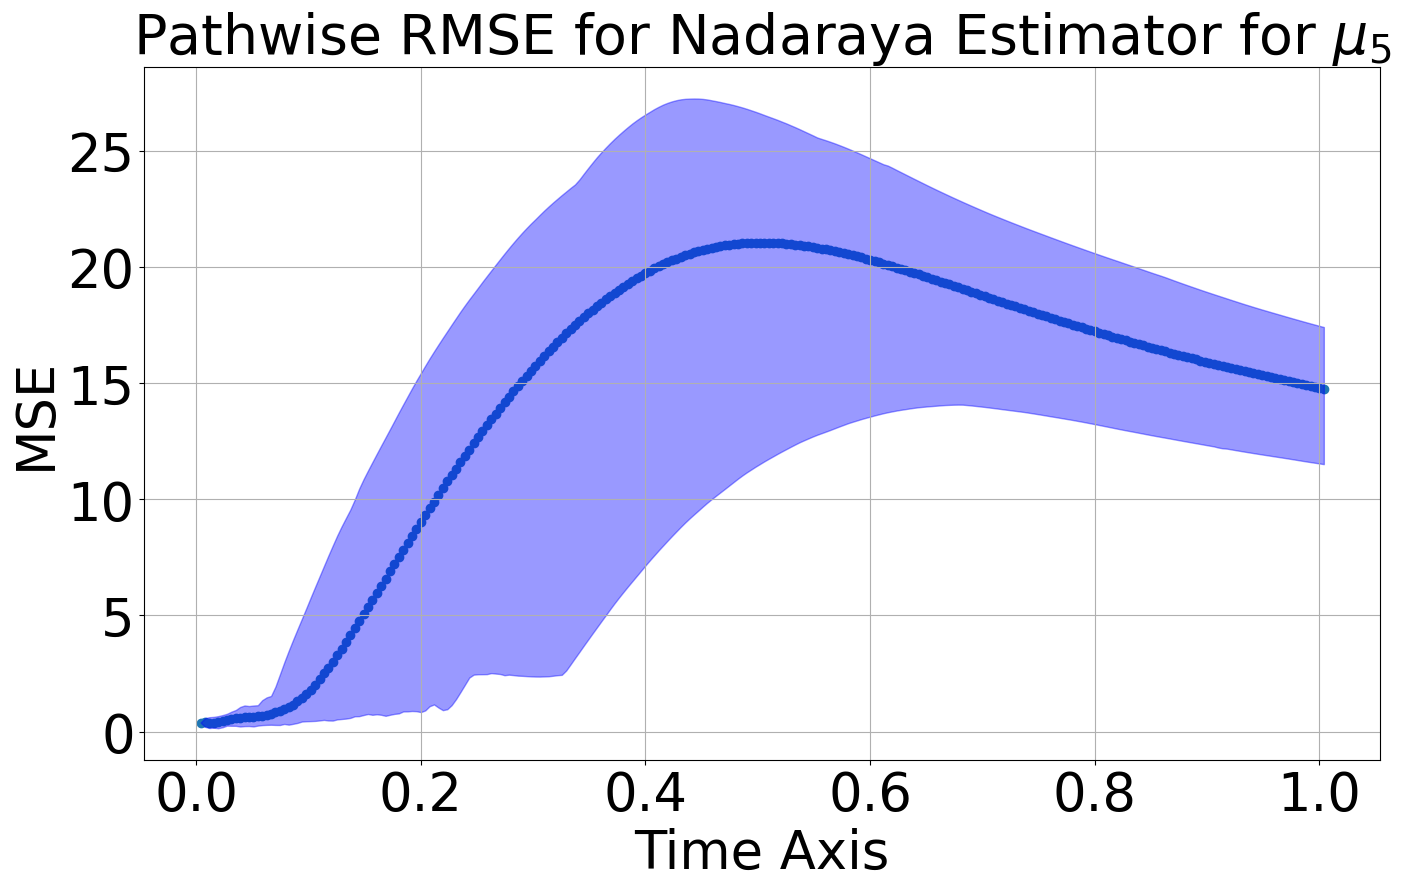

Final time cumulative MSE local-time error 14.742484611258313 with IQR ((11.507963305233698, 17.407395123943836))at bw 0.009649 for 0.75FConst

13.883748702400535 0.0127401 14.742484611258313


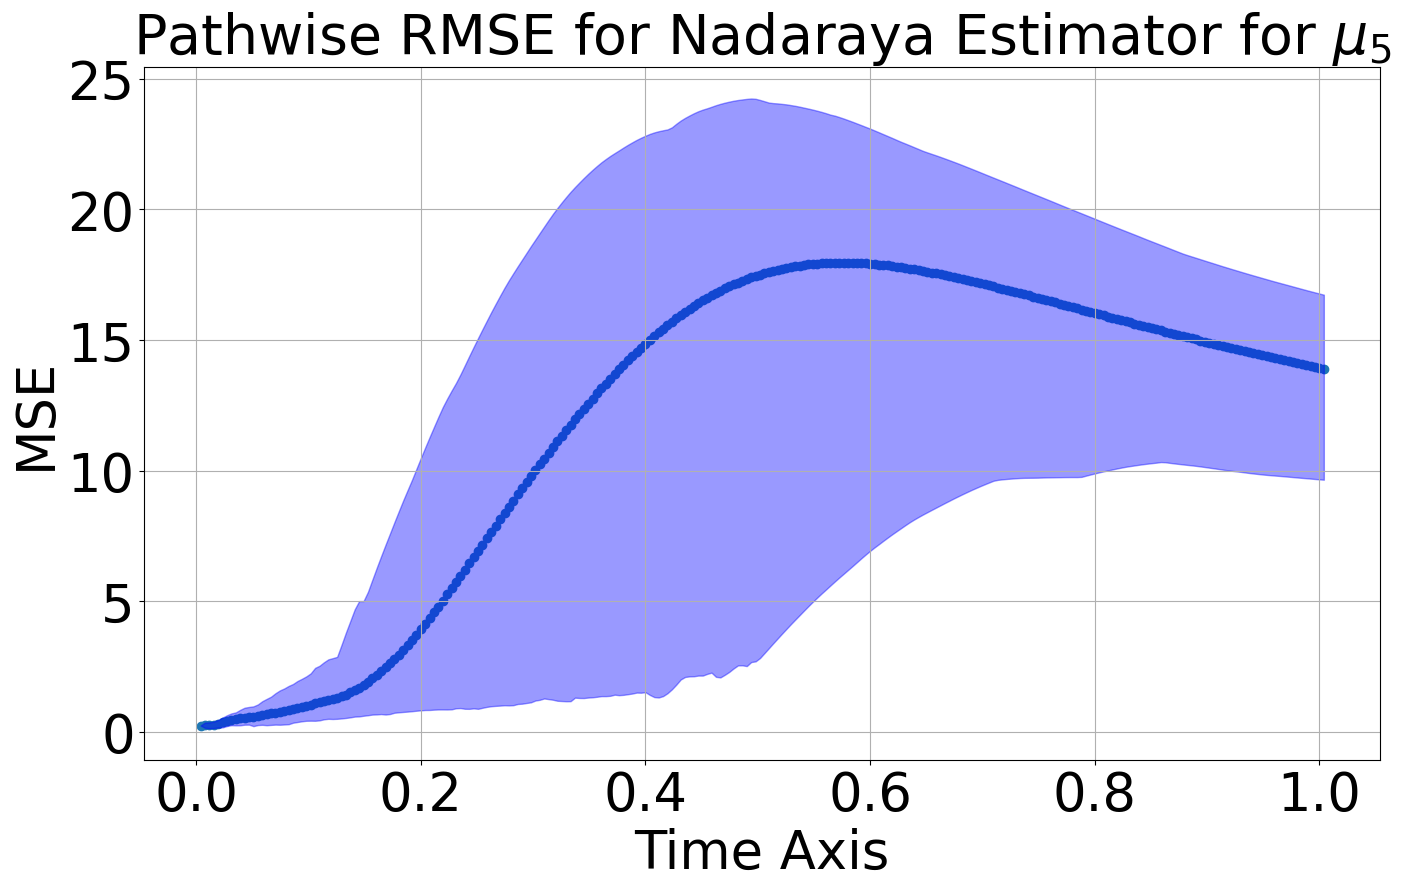

Final time cumulative MSE local-time error 13.883748702400535 with IQR ((9.65207912361074, 16.7338299095585))at bw 0.0127401 for 0.75FConst

11.549655435391715 0.0168214 13.883748702400535


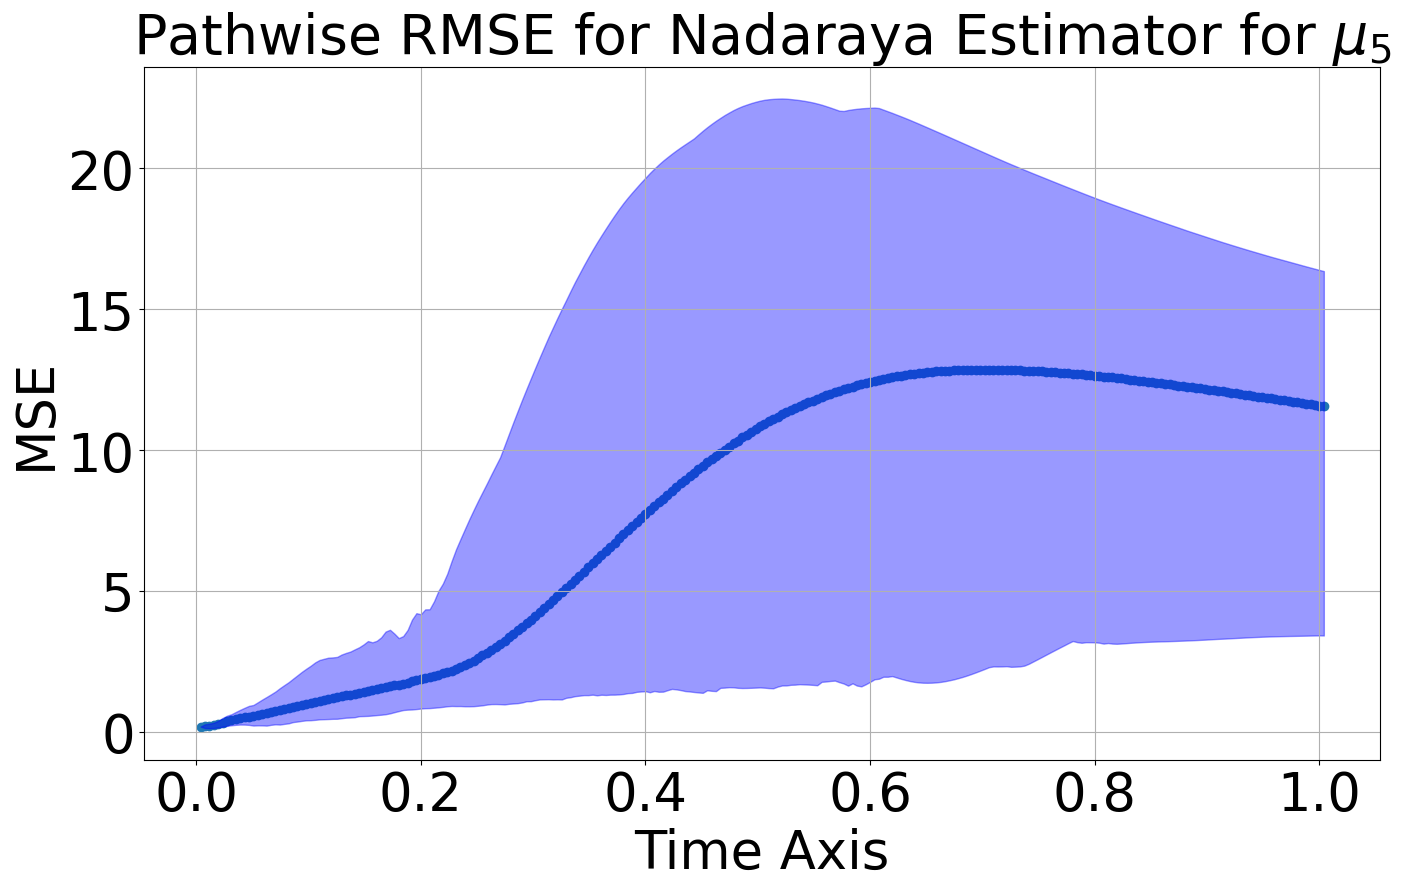

Final time cumulative MSE local-time error 11.549655435391715 with IQR ((3.4183878453598817, 16.348314289531878))at bw 0.0168214 for 0.75FConst

7.471610616823292 0.0222102 11.549655435391715


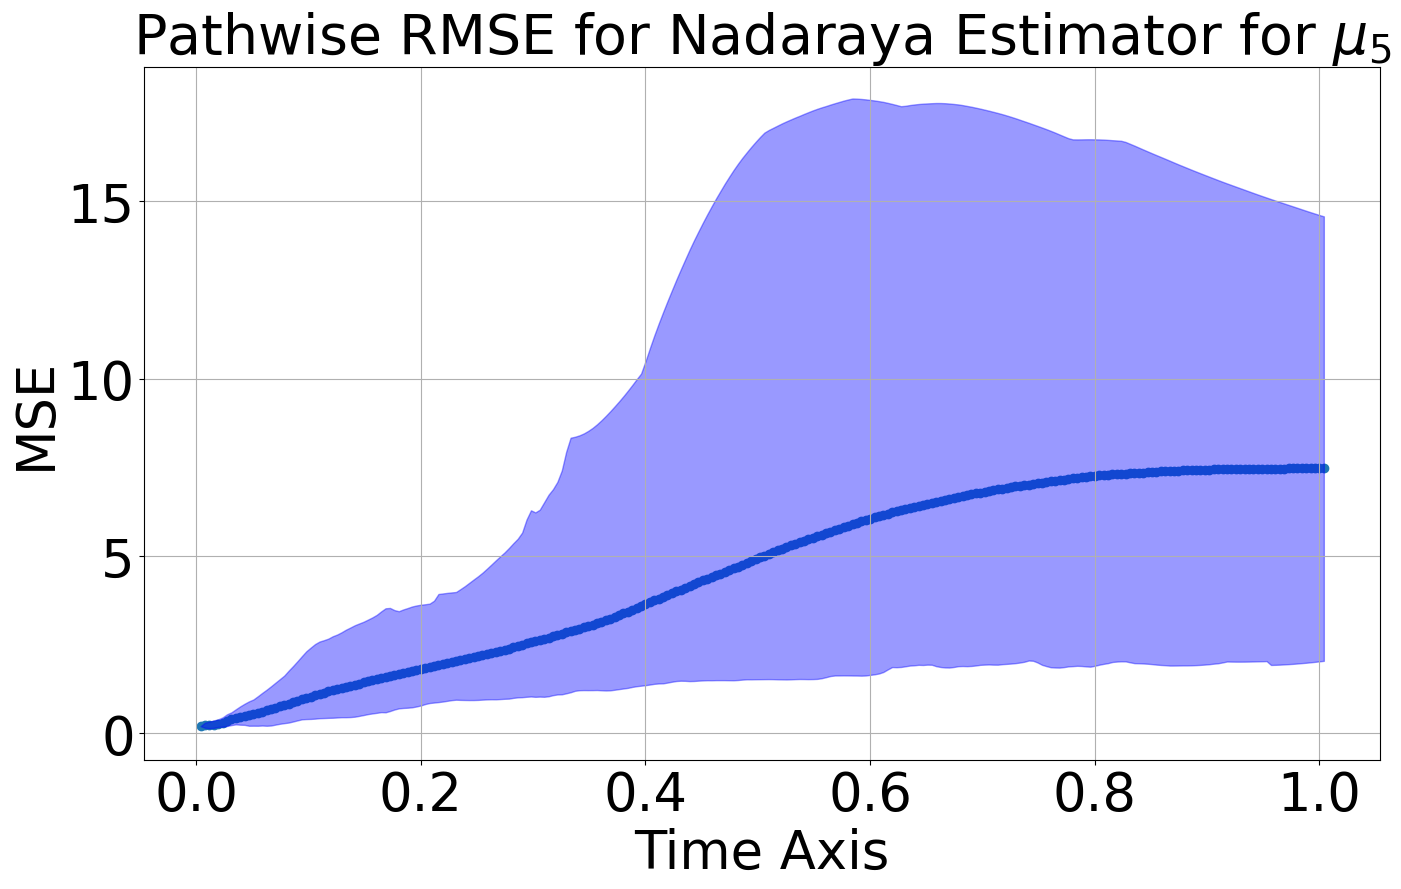

Final time cumulative MSE local-time error 7.471610616823292 with IQR ((2.042167800906583, 14.573980557238444))at bw 0.0222102 for 0.75FConst

4.837961879556747 0.0293252 7.471610616823292


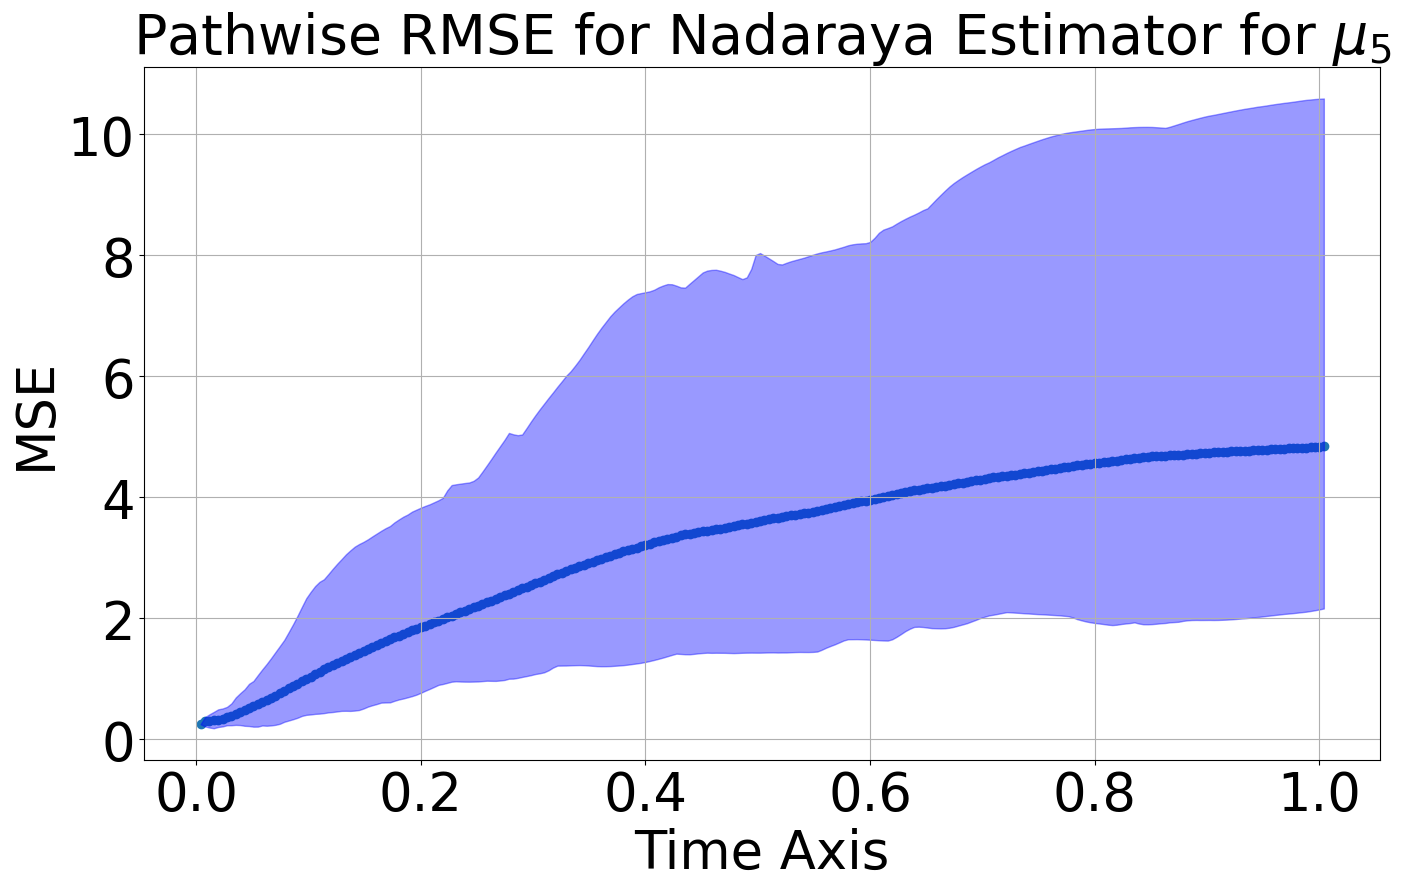

Final time cumulative MSE local-time error 4.837961879556747 with IQR ((2.1579291889279357, 10.587141379604002))at bw 0.0293252 for 0.75FConst

4.358726278386699 0.0387196 4.837961879556747


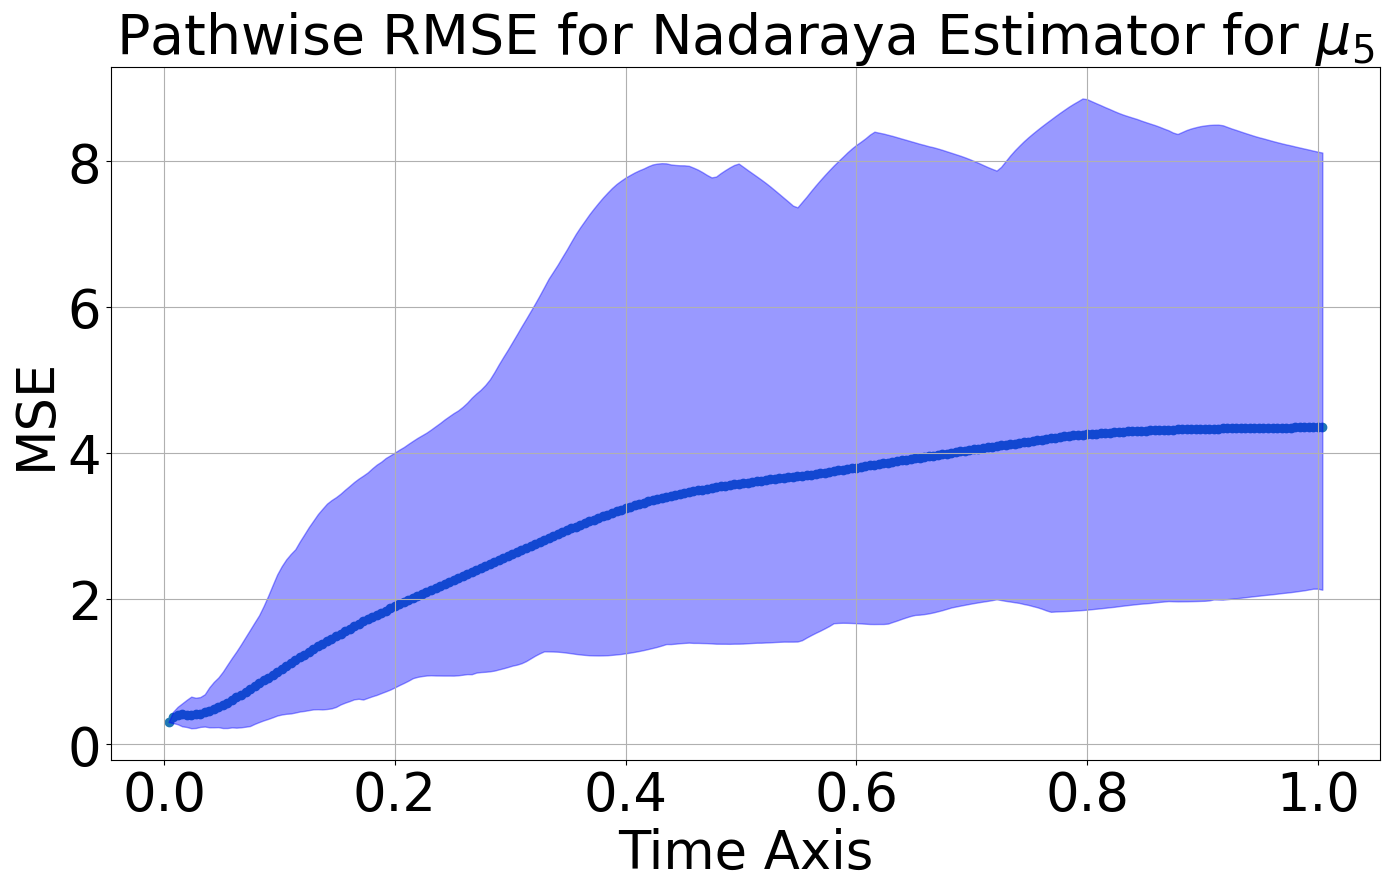

Final time cumulative MSE local-time error 4.358726278386699 with IQR ((2.1215727630873764, 8.118012761039529))at bw 0.0387196 for 0.75FConst

4.3098862861433425 0.0511235 4.358726278386699


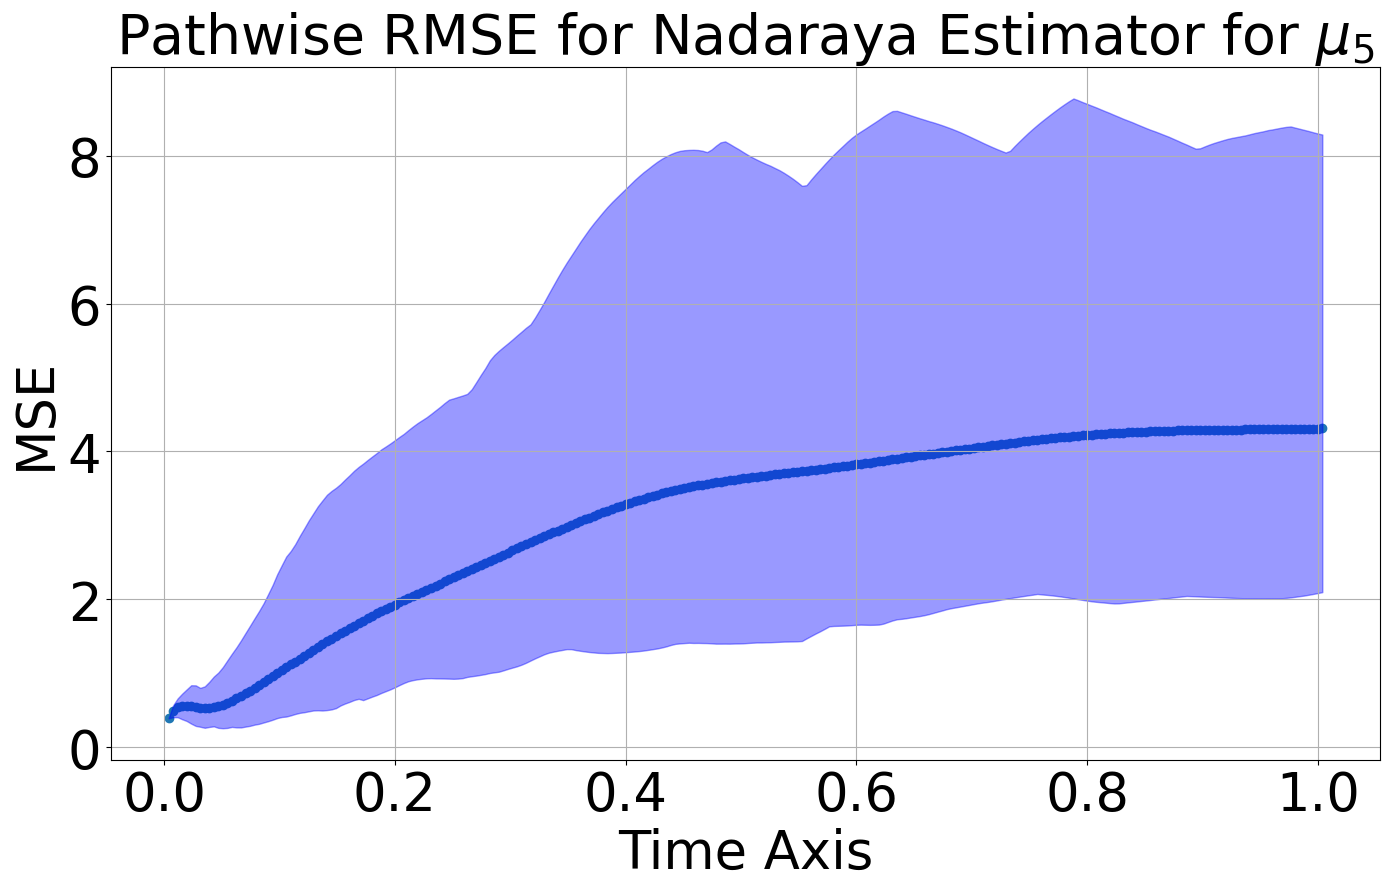

Final time cumulative MSE local-time error 4.3098862861433425 with IQR ((2.0960223162697997, 8.285194764103341))at bw 0.0511235 for 0.75FConst

4.315124637205361 0.067501 4.3098862861433425
4.353811732407206 0.0891251 4.3098862861433425
5.148785143756028 0.1 4.3098862861433425
4.403124029947963 0.1135011 4.3098862861433425
4.462858435760523 0.144544 4.3098862861433425
4.532867961358121 0.1840772 4.3098862861433425
4.612114936660756 0.2344229 4.3098862861433425
4.701560474805933 0.2985383 4.3098862861433425
4.810531585845408 0.3801894 4.3098862861433425
4.967858634785887 0.4841724 4.3098862861433425
5.196455024053497 0.616595 4.3098862861433425
5.305310235069381 0.7852356 4.3098862861433425


In [5]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/20DLnzLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [6]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

{'progress_name': 'idx',
 'span_units': 19.0,
 'wall_clock_h_total': 12.669016990926531,
 'wall_clock_per_unit_h': 0.6667903679435017,
 'cpu_avg_pct': 16.434031413612722,
 'cpu_peak_pct': 45.9,
 'ram_avg_gib': 178.11739249214648,
 'ram_peak_gib': 1366.85174,
 'gpu_util_avg_pct': None,
 'gpu_util_peak_pct': None,
 'gpu_mem_avg_gib': None,
 'gpu_mem_peak_gib': None}